<a href="https://colab.research.google.com/github/indraAraujo/WineQualityClassification/blob/main/Vinho_Verde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset -> Vinho Verde wine quality


In [ ]:
import pandas as pd
from google.colab import data_table
from vega_datasets import data

# reading csv files
wine_quality_full=  pd.read_csv('winequality-red.csv', sep=";")
data_table.enable_dataframe_formatter()
wine_quality_full
#%store wine_quality_full

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Preprocessing the dataset

1. find the correlation between the atributes with a correlogram and drop the unacessary atributes columns

2. get the outliers of each atribute and remove the sample

3. transform the quality range for each class to a equivalent single value

,fixed acidity,volatile acidity,citric acid,residual sugar,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.56,9.4,2
...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.71,10.2,2


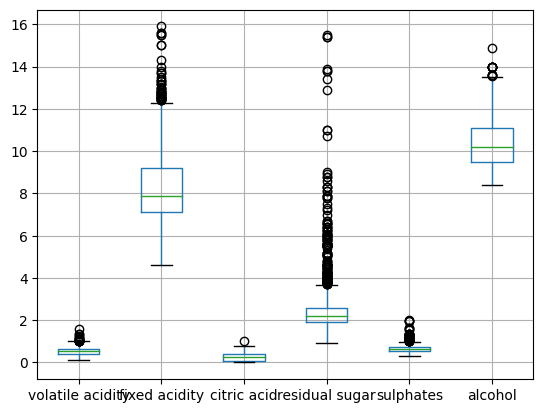

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

##CORRELOGRAM
correlogram = wine_quality_full.corr()

#view correlogram by heatmap
#sns.heatmap(correlogram, annot=True, fmt=".2f")

##DROP COLUMNS OF ATRIBUTES THAT DOES NOT HAVE MEDIUM/STRONG CORRELATION WITH 
  #QUALITY
wq_selected_features = wine_quality_full.drop([
    'free sulfur dioxide',
    'total sulfur dioxide',
    'pH',
    'density',
    'chlorides',
    ], axis=1);

##OUTLIER DETECTION
#boxplot of each column
wq_selected_features.boxplot(column=[
    'volatile acidity', 
    'fixed acidity',
    'citric acid',
    'residual sugar',
    'sulphates',
    'alcohol'
    ])
#plt.show()

# setting most outliers of each atribute
max_volatile_acidity= 1.5
max_fixed_acidity = 15
max_citric_acid = 1
max_residual_sugar = 10
max_sulphates = 1.5
max_alcohol = 14

# Fixed Acidity
for index, row in wq_selected_features.iterrows():
    fixed_acidity = row['fixed acidity']
    if fixed_acidity >= max_fixed_acidity:
      #print(fixed_acidity, index)
      wq_selected_features.drop(index, inplace=True)
# Volatile Acidity   
for index, row in wq_selected_features.iterrows():
    volatile_acidity = row['volatile acidity']
    if volatile_acidity >= max_volatile_acidity:
      #print(volatile_acidity, index)
      wq_selected_features.drop(index, inplace=True)
    
# Citric Acid
for index, row in wq_selected_features.iterrows():
    citric_acid = row['citric acid']
    if citric_acid >= max_citric_acid:
      #print(citric_acid, index)
      wq_selected_features.drop(index, inplace=True)

# Residual Sugar
for index, row in wq_selected_features.iterrows():
    residual_sugar = row['residual sugar']

    if residual_sugar >= max_residual_sugar:
      #print(residual_sugar, index)
      wq_selected_features.drop(index, inplace=True)
# Sulphates
for index, row in wq_selected_features.iterrows():
    sulphates = row['sulphates']

    if sulphates >= max_sulphates:
      #print(sulphates, index)
      wq_selected_features.drop(index, inplace=True)

# Alcohol
for index, row in wq_selected_features.iterrows():
    alcohol = row['alcohol']

    if alcohol >= max_alcohol:
      #print(alcohol, index)
      wq_selected_features.drop(index, inplace=True)

##TRANSFORM RANGE QUALITY ATRIBUTE TO A SINGLE VALUE SUCH AS:
  #1-4 (POOR) = 1
  #5-6 (NORMAL) = 2
  #7-10 (EXCELLENT) = 3

min_poor = 1
max_poor = 4
min_normal = 5
max_normal = 6
min_excellent = 7
max_excellent = 10

for index, row in wq_selected_features.iterrows():
    quality = row['quality']

    if (quality >= min_poor)&(quality <= max_poor):
      wq_selected_features.at[index, 'quality'] = 1
    elif (quality >= min_normal)&(quality <= max_normal):
      wq_selected_features.at[index, 'quality'] = 2
    else:
     wq_selected_features.at[index, 'quality'] = 3
     
wq_selected_features

DATA SPLIT BETWEEN TEST AND TRAINING SETS

Separate columns that are input and output (quality).

Use cross validation with leave one out data split method. 

In [ ]:
from sklearn.model_selection import train_test_split

var_columns = [ 
    'fixed acidity', 
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'sulphates', 
    'alcohol']
input = wq_selected_features.loc[:, var_columns]

output = wq_selected_features['quality']

# Using 70/30 data split method for example
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.33)

CLASSIFICATION ALGORITHM 1 - DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(class_weight="balanced", max_depth=4, criterion="entropy")
decision_tree = decision_tree.fit(input_train, output_train)

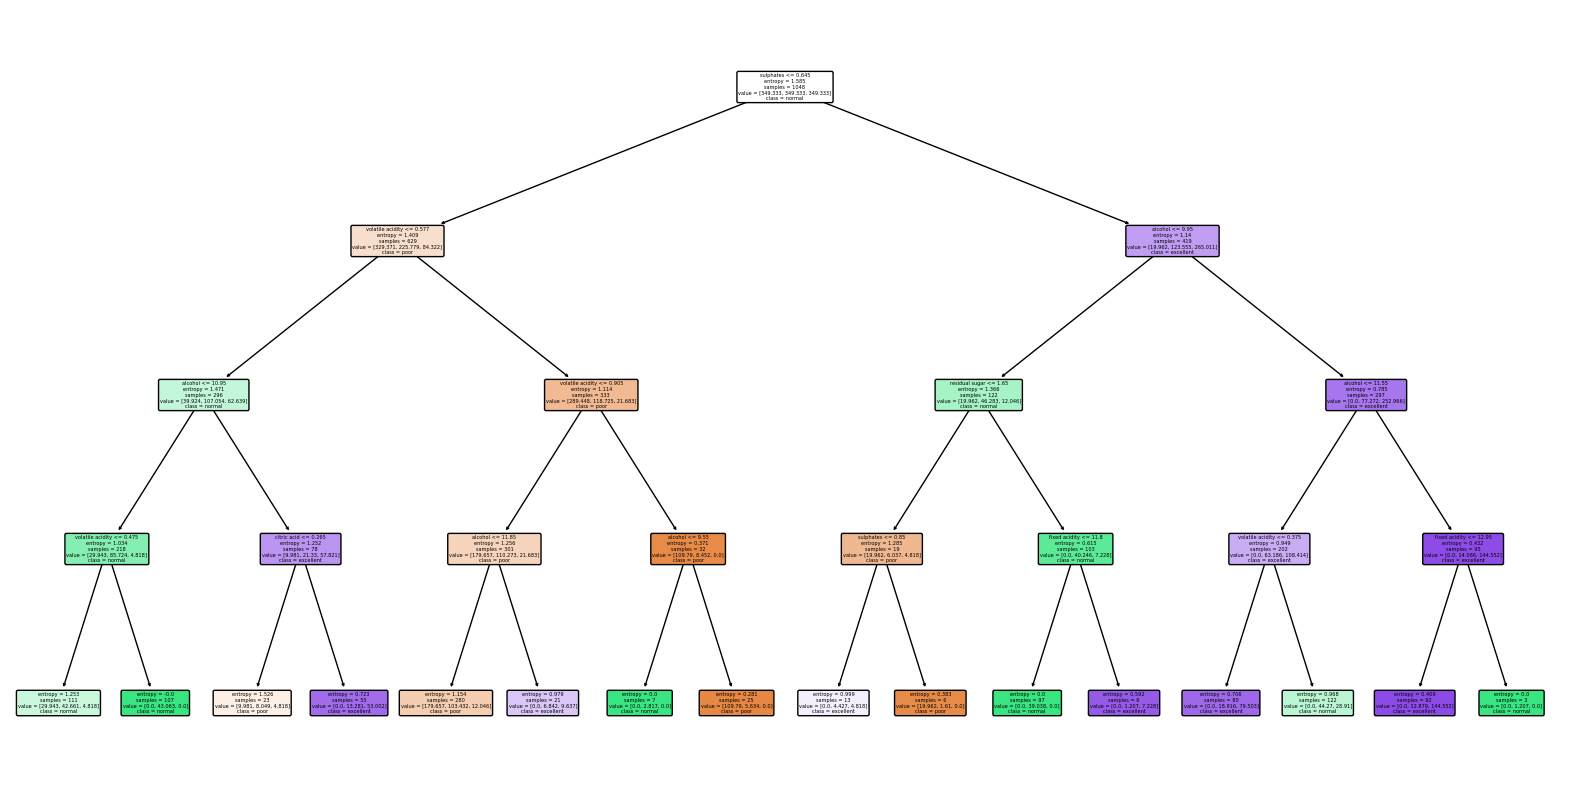

In [ ]:
from sklearn.tree import plot_tree

#Plot decision tree
plt.figure(figsize=(20,10))

#Create the tree plot
plot_tree(decision_tree,
           feature_names = var_columns, #Feature names
           class_names = ["poor","normal", "excellent"], #Class names
           rounded = True,
           filled = True)

plt.show()

Understanding the model by applying metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

##THE PREDICTIONS
predictions = decision_tree.predict(input_test)
predictions

##ACCURACY
accuracy = accuracy_score(output_test, predictions)
accuracy

##CONFUSION MATRIX
confusion_matrix(output_test, predictions, labels=[1,2, 3])


array([[ 16,   8,   1],
       [114, 242,  70],
       [  4,  21,  41]])

CLASSIFICATION ALGORITHM 2 - NEURAL NETWORK CLASSIFIER

In [ ]:
#MLP CLASSIFIER

from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
import graphviz

#mlp = MLPClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(500, 700))
mlp.fit(input_train, output_train)



MLPClassifier(hidden_layer_sizes=(500, 700))

Understanding the model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

##THE PREDICTIONS
predictions = mlp.predict(input_test)
predictions

##ACCURACY
accuracy = accuracy_score(output_test, predictions)
#accuracy

##CONFUSION MATRIX
confusion_matrix(output_test, predictions, labels=[1,2, 3])

array([[  0,  24,   1],
       [  0, 425,   1],
       [  0,  63,   3]])

Graphic view of the trained model


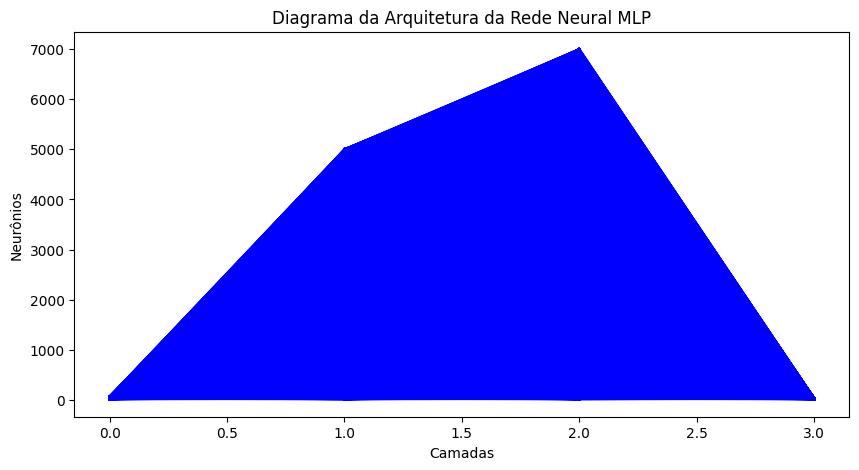

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Supondo que você já tenha treinado o modelo MLP e o tenha atribuído à variável "model"

# Obtendo as camadas ocultas da rede neural
hidden_layers = mlp.hidden_layer_sizes

# Adicionando o número de unidades na camada de entrada e na camada de saída
hidden_layers = [mlp.n_features_in_] + list(hidden_layers) + [mlp.n_outputs_]

# Criando uma figura para o diagrama
fig = plt.figure(figsize=(10, 5))

# Adicionando as camadas ocultas ao diagrama
for i in range(len(hidden_layers) - 1):
    layer_size_curr = hidden_layers[i]
    layer_size_next = hidden_layers[i+1]
    
    # Calculando a posição dos neurônios na camada atual e na camada seguinte
    curr_pos = [(i+1)*10 for i in range(layer_size_curr)]
    next_pos = [(i+1)*10 for i in range(layer_size_next)]
    
    # Plotando as conexões entre as camadas
    for curr_neuron in curr_pos:
        for next_neuron in next_pos:
            plt.plot([i, i+1], [curr_neuron, next_neuron], 'b')
    
# Definindo os rótulos dos eixos
plt.xlabel('Camadas')
plt.ylabel('Neurônios')

# Definindo o título do gráfico
plt.title('Diagrama da Arquitetura da Rede Neural MLP')

# Exibindo o gráfico
plt.show()
